# Chapter 2 - Common Knowledge and the Beauty Contest

## Introduction

In this chapter, we explore key concepts in Game Theory: **Common Knowledge**, **Rationality**, and **Iterated Elimination of Dominated Strategies (IEDS)**. We will illustrate these concepts using the famous "Beauty Contest" game (also known as the "Guess 2/3 of the Average" game).

### Common Knowledge

Common Knowledge is a crucial concept in Game Theory. A piece of information is **Common Knowledge** among a group of agents if:
1. Everyone knows it.
2. Everyone knows that everyone knows it.
3. Everyone knows that everyone knows that everyone knows it.
... and so on, *ad infinitum*.

Rationality requires that players know the rules perfectly and do not make mistakes. However, in real-world scenarios, common knowledge of rationality is often violated because people may doubt the rationality of others.


## The Beauty Contest Game (Guess 2/3 of the Average)

### Rules
1. Each player chooses a number between 0 and 100.
2. The winner is the player whose number is closest to $2/3$ of the average of all chosen numbers.

### Mathematical Analysis (Iterated Elimination of Dominated Strategies)

Let's analyze this using **IEDS**:

1.  **Level 0**: A purely random or irrational player might choose any number between 0 and 100. The average cannot exceed 100, so $2/3$ of the average cannot exceed $66.67$.
    *   Therefore, any choice $> 66.67$ is a **dominated strategy**. A rational player (Level 1) will not choose $> 66.67$.

2.  **Level 1**: If everyone is rational (Level 1) and chooses $\le 66.67$, the average cannot exceed $66.67$. Thus, $2/3$ of the average cannot exceed $2/3 \times 66.67 \approx 44.44$.
    *   Any choice $> 44.44$ is now dominated. A Level 2 rational player will choose $\le 44.44$.

3.  **Level 2**: If everyone chooses $\le 44.44$, the target is at most $29.63$.

4.  ... Continuing this logic *ad infinitum*, the only unique Nash Equilibrium is **0**.

However, in experimental settings, the winning number is rarely 0. It is often much higher, implying that players assume a limited depth of rationality in their opponents (e.g., Level-k Reasoning).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## Simulation: Level-k Reasoning

We can simulate a population of agents with different levels of reasoning:
- **Level-0**: Chooses uniformly at random between 0 and 100. (avg 50)
- **Level-1**: Assumes everyone else is Level-0 (avg 50) -> Chooses $2/3 * 50 = 33.3$.
- **Level-2**: Assumes everyone else is Level-1 (avg 33.3) -> Chooses $2/3 * 33.3 = 22.2$.
- **Level-k**: Chooses $(2/3)^k * 50$.

Let's simulate a mixed population and see the distribution of guesses.


### Historical Context & Key Authors

The concept of **Hierarchical Beliefs** (or Level-k Reasoning/Cognitive Hierarchy) has been shaped by several key figures:

*   **John Maynard Keynes (1936)**: Proposed the original "beauty contest" analogy for stock market speculation, describing it as anticipating what others anticipate.
*   **Rosemarie Nagel (1995)**: Pioneered the experimental study of the game ("Unraveling in Guessing Games"), classifying behavior into Level-0, Level-1, etc.
*   **Stahl & Wilson (1994, 1995)**: Developed early Level-k models.
*   **Camerer, Ho, and Chong (2004)**: Developed the **Cognitive Hierarchy (CH)** model, a formal statistical model of these reasoning levels.


Average: 48.56
Target (2/3 of Avg): 32.38
Winner: 32.38


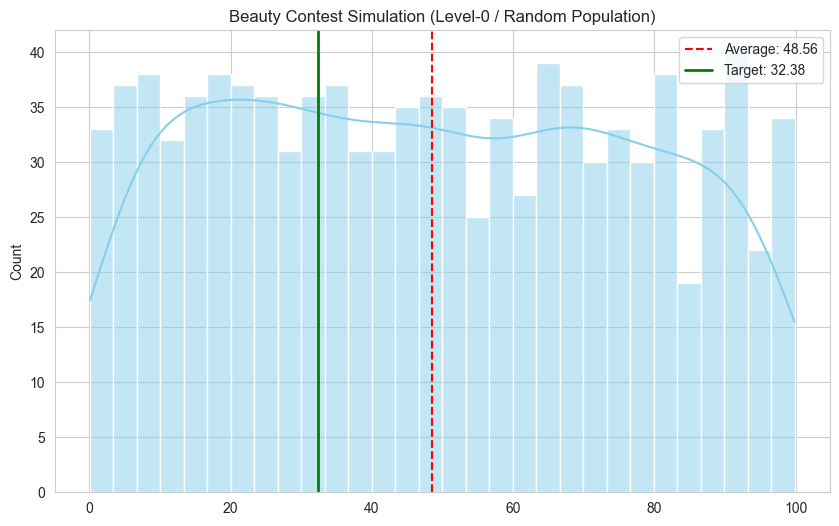

In [3]:
def run_beauty_contest(n_players=1000, distribution='uniform'):
    "Simulate the Beauty Contest with a simple random population first."
    if distribution == 'uniform':
        guesses = np.random.uniform(0, 100, n_players)
    elif distribution == 'normal':
        guesses = np.random.normal(50, 15, n_players)
        guesses = np.clip(guesses, 0, 100)
    
    average = np.mean(guesses)
    target = (2/3) * average
    
    winner_idx = np.argmin(np.abs(guesses - target))
    winner_guess = guesses[winner_idx]
    
    return guesses, average, target, winner_guess

# Run a simple random simulation (Level-0 population)
guesses, avg, target, winner = run_beauty_contest(n_players=1000)

print(f"Average: {avg:.2f}")
print(f"Target (2/3 of Avg): {target:.2f}")
print(f"Winner: {winner:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(guesses, bins=30, kde=True, color='skyblue')
plt.axvline(avg, color='red', linestyle='--', label=f'Average: {avg:.2f}')
plt.axvline(target, color='green', linestyle='-', linewidth=2, label=f'Target: {target:.2f}')
plt.title('Beauty Contest Simulation (Level-0 / Random Population)')
plt.legend()
plt.show()


### Mixed Population Simulation

In reality, a population consists of players with different levels of rationality (k-levels).
Let's simulate a population composed of Level-0, Level-1, Level-2, and Level-3 thinkers.


In [ ]:
def simulate_mixed_population(n_players=1000, proportions={0: 0.4, 1: 0.3, 2: 0.2, 3: 0.1}):
    guesses = []
    
    for level, prop in proportions.items():
        count = int(n_players * prop)
        if level == 0:
            # Level 0 is random
            g = np.random.uniform(0, 100, count)
        else:
            # Level k best responds to Level k-1
            # Assuming Level k-1 corresponds to a "typical" guess of 50 * (2/3)^(k-1)
            # So Level k guesses 50 * (2/3)^k.
            # We add some noise to make it realistic
            val = 50 * ((2/3)**level)
            g = np.random.normal(val, 2, count) # Small noise
            
        guesses.extend(g)
        
    guesses = np.array(guesses)
    guesses = np.clip(guesses, 0, 100)
    
    average = np.mean(guesses)
    target = (2/3) * average
    
    return guesses, average, target

guesses_mixed, avg_m, target_m = simulate_mixed_population()

print(f"Mixed Pop Average: {avg_m:.2f}")
print(f"Mixed Pop Target: {target_m:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(guesses_mixed, bins=50, kde=False, color='purple', stat='density')
plt.axvline(avg_m, color='red', linestyle='--', label=f'Average: {avg_m:.2f}')
plt.axvline(target_m, color='green', linestyle='-', linewidth=2, label=f'Target: {target_m:.2f}')
plt.title('Beauty Contest: Mixed Level-k Population')
plt.xlabel('Guess')
plt.legend()
plt.show()


## In-Class Experiment: Finite Action Set (IEDS)

We analyzed a 4x4 game in class to demonstrate **Iterated Elimination of Dominated Strategies (IEDS)**.

### The Payoff Matrix
The strategies are labeled A, B, C, D for both Player 1 (Rows) and Player 2 (Columns).
Strategies C and D for Player 1 are strictly dominated by A.

| P1 \ P2 | A | B | C | D |
| :--- | :---: | :---: | :---: | :---: |
| **A** | 3, -1 | 3, 1 | 3, -2 | 11, -2 |
| **B** | 1, 1 | 3, -1 | 3, -3 | 3, -2 |
| **C** | 2, -2 | 0, 4 | 2, 5 | 1, 3 |
| **D** | 0, -5 | 0, -3 | 2, -1 | 2, -4 |

### Analysis

1.  **Round 1 (Player 1)**:
    *   Compare **A** vs **C**: $3>2, 3>0, 3>2, 11>1$. **A strictly dominates C**.
    *   Compare **A** vs **D**: $3>0, 3>0, 3>2, 11>2$. **A strictly dominates D**.
    *   *Eliminate C and D.*

2.  **Round 2 (Player 2)**:
    *   Player 2 only considers rows **A** and **B**.
    *   Payoffs in {A, B}:
        *   A: -1, 1
        *   B: 1, -1
        *   C: -2, -3
        *   D: -2, -2
    *   Compare **B** vs **C**: $1 > -2, -1 > -3$. **B strictly dominates C**.
    *   Compare **B** vs **D**: $1 > -2, -1 > -2$. **B strictly dominates D**.
    *   *Eliminate C and D.*

3.  **Round 3 (Resulting 2x2 Game)**:
    *   We are left with {A, B} for both players.
    *   | | A | B |
        |---|---|---|
        | **A** | 3, -1 | 3, 1 |
        | **B** | 1, 1 | 3, -1 |
    *   **Player 1**: A yields (3, 3), B yields (1, 3).
    *   A **weakly dominates** B ($3>1, 3=3$).
    *   If we eliminate weakly dominated strategies, Player 1 chooses **A**.

4.  **Final Outcome**:
    *   If Player 1 chooses **A**, Player 2's best response is **B** (payoff 1 vs -1).
    *   Unique Equilibrium: **(A, B)** with payoffs **(3, 1)**.



In [ ]:
import pandas as pd

# Define Payoff Matrices (P1, P2)
# Strategies 0, 1, 2, 3 corresponded to A, B, C, D
payoffs_p1 = np.array([
    [3, 3, 3, 11],
    [1, 3, 3, 3],
    [2, 0, 2, 1],
    [0, 0, 2, 2]
])

payoffs_p2 = np.array([
    [-1, 1, -2, -2],
    [1, -1, -3, -2],
    [-2, 4, 5, 3],
    [-5, -3, -1, -4]
])

strategies = ['A', 'B', 'C', 'D']
df = pd.DataFrame(index=strategies, columns=strategies)

for r in range(4):
    for c in range(4):
        df.iloc[r, c] = f"({payoffs_p1[r, c]}, {payoffs_p2[r, c]})"

print("Original Payoff Matrix:")
display(df)



## Optimal Hierarchical Beliefs (Convergence to 0)

If we assume **Common Knowledge of Rationality**, every player should theoretically converge to the Nash Equilibrium of 0.

Let's model this process iteratively:
1.  Assume initially players might choose anywhere up to 100 (Max Average = 100).
2.  Best response to Max Average of 100 is $2/3 * 100 = 66.67$.
3.  If everyone acts this way, the new Max Average is 66.67.
4.  Best response to 66.67 is $2/3 * 66.67 = 44.44$.
5.  ... and so on.

The following code demonstrates this convergence.



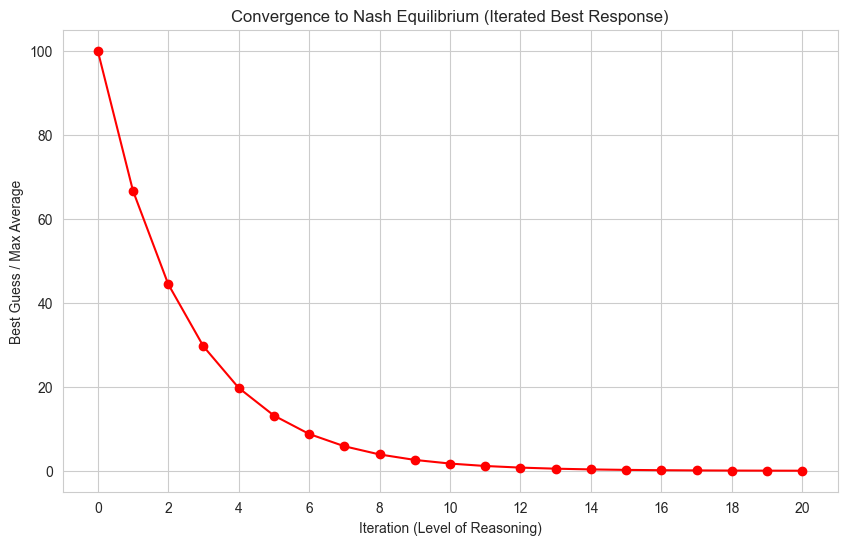

Value after 20 iterations: 0.0301


In [2]:
def plot_convergence(iterations=20):
    values = [100] # Starting max possible average
    
    for i in range(iterations):
        next_val = values[-1] * (2/3)
        values.append(next_val)
        
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(values)), values, marker='o', linestyle='-', color='red')
    plt.title('Convergence to Nash Equilibrium (Iterated Best Response)')
    plt.xlabel('Iteration (Level of Reasoning)')
    plt.ylabel('Best Guess / Max Average')
    plt.grid(True)
    plt.xticks(range(0, len(values), 2))
    plt.show()
    
    print(f"Value after {iterations} iterations: {values[-1]:.4f}")

plot_convergence()


## Conclusion

The Beauty Contest demonstrates that theoretical rationality (Nash Equilibrium = 0) often diverges from behavioral reality. Successful players in this game do not just solve for the equilibrium; they accurately estimate the "levels of thinking" of the other players.
